### Modelo Clustering K-Means


Para segmentacion de datos.
Ya no buscamos hacer una prediccion sino separar los datos en grupos.

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [138]:
df=pd.read_csv(r'C:\Users\carolina\Desktop\FormDataAnalyst\Modelos\clustering_k_means.csv')

In [139]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [140]:
df.shape

(200, 5)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [142]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [143]:
df['Genre'].value_counts() # mas mujeres que hombres. Esta descompensada esta variable.

Female    112
Male       88
Name: Genre, dtype: int64

In [145]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


#### Dummys y Missing no hay

In [144]:
df.isnull().value_counts()

CustomerID  Genre  Age    Annual Income (k$)  Spending Score (1-100)
False       False  False  False               False                     200
dtype: int64

#### Seleccion de variables (en este caso al ser clustering solo independientes)

Utilizaremos dos variables: Gasto e Ingreso (Spending Score  y Annual Income)

In [109]:
# Ya no tenemos variable y. No estamos prediciendo. Solo necesitamos variables de entrada para el modelo de clustering.

In [149]:
x=df.loc[:,['Spending Score (1-100)', 'Annual Income (k$)']].values
#x

#### Separacion training/test. Para Clustering NO aplica.

#### Normalizacion/estandarizacion en Clustering NO aplica.

#### Visualizacion de las variables para mas o menos ver si se observan grupos.

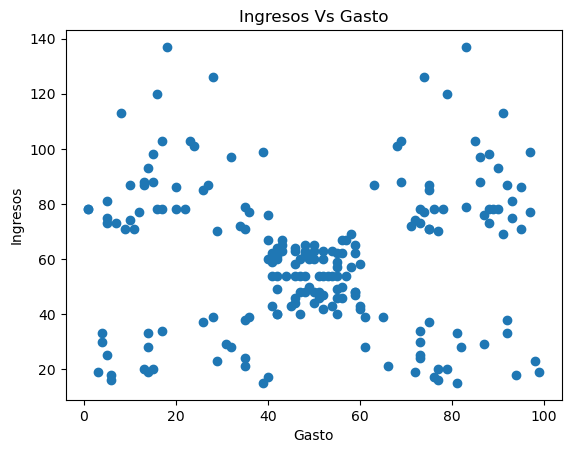

In [154]:
plt.scatter(x[:,0],x[:,1])
plt.title('Ingresos Vs Gasto')
plt.xlabel('Gasto')
plt.ylabel('Ingresos')
plt.show()

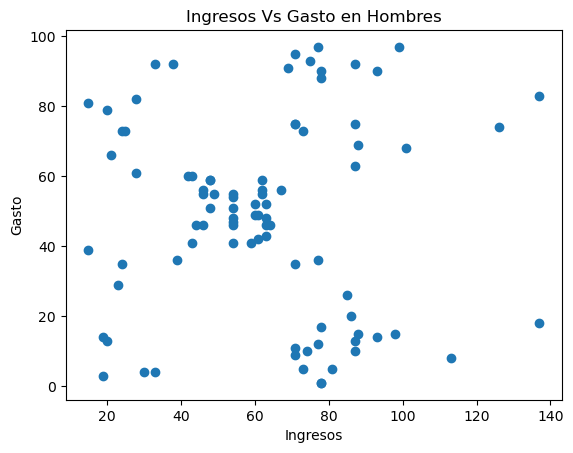

In [156]:
plt.scatter(df[df['Genre']=='Male']['Annual Income (k$)'],df[df['Genre']=='Male']['Spending Score (1-100)'])
plt.title('Ingresos Vs Gasto en Hombres')
plt.xlabel('Ingresos')
plt.ylabel('Gasto')
plt.show()

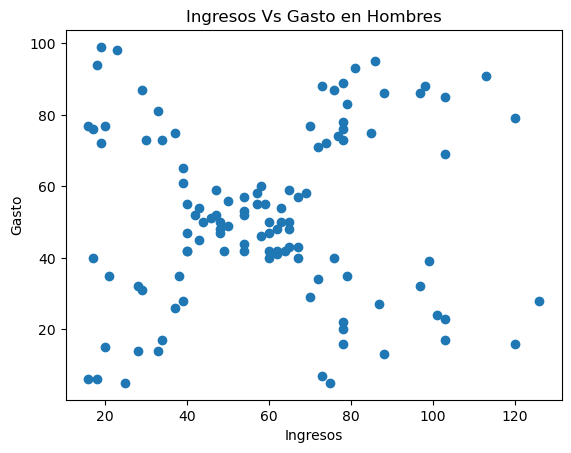

In [157]:
plt.scatter(df[df['Genre']=='Female']['Annual Income (k$)'],df[df['Genre']=='Female']['Spending Score (1-100)'])
plt.title('Ingresos Vs Gasto en Hombres')
plt.xlabel('Ingresos')
plt.ylabel('Gasto')
plt.show()

In [ ]:
Mas o menos se agrupan igual.

#### Visualizamos la GRAFICA DEL CODO para establecer numero optimo de clusters

Con esta grafica se obtiene el parametro NCS (relacion lineal de la media de los cercanos) que indica la cantidad de grupos posibles, en base al analisis de la grafica que indica el numero de casos posibles para cada grupo. Si NCS aumenta (nro de casos por grupo) la cantidad de segmentos/grupo es menor. 

* Esto nos dará el NUMERO de CLUSTERS OPTIMO


In [169]:
from sklearn.cluster import KMeans  

C:\Users\carolina\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\carolina\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\carolina\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\carolina\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory le

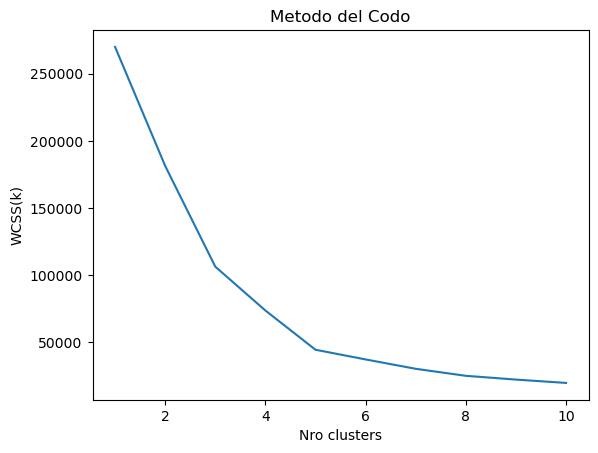

In [174]:
w=[]
for k in range(1,11):  # el doble de los que hemos visto en la grafica (se observan 5 grupos)
    K_Means=KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=1987).fit(x)
    w.append(K_Means.inertia_) # valor de WCSS 
    
plt.plot(range(1,11), w)
plt.title('Metodo del Codo')
plt.xlabel('Nro clusters')
plt.ylabel('WCSS(k)')
plt.show()

* El ultimo cambio de tendencia esta en 5.
* El metodo del codo sugiere 5 clusters como numero optimo. Coinicide con lo que vimos en la grafica anterior. 

In [175]:
### Ademas me da una advertencia por un tema con windows, que me arroja tras cada iteracion (10 en total)

#### Creacion del modelo K-Means

In [176]:
clasificador=KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=1987) ## esto cogido de grafica
clasificador

KMeans(n_clusters=5, n_init=10, random_state=1987)

#### Prediccion

In [177]:
y_prediccion = clasificador.fit_predict(x)
y_prediccion

C:\Users\carolina\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0,
       1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 4, 0, 4, 2, 4, 2, 4,
       0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

Por cada valor de X nos esta indicando a que clase pertenece.

In [131]:
(x_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

##### Evaluacion del modelo NO aplica en Clustering

#### Visualizacion del Modelo

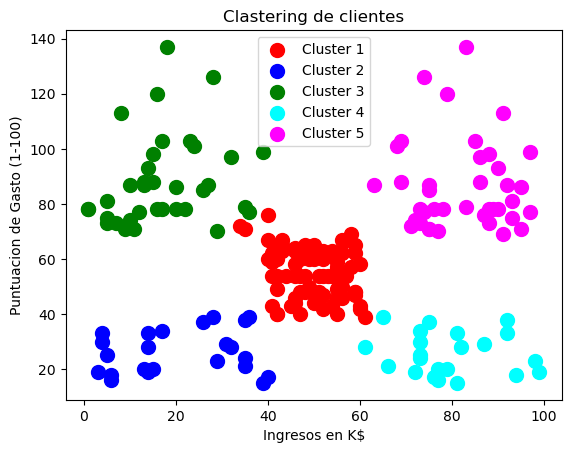

In [181]:
plt.scatter(x[y_prediccion==0, 0], x[y_prediccion==0, 1], s=100, c = 'red',label='Cluster 1')
plt.scatter(x[y_prediccion==1, 0], x[y_prediccion==1, 1], s=100, c = 'blue',label='Cluster 2')
plt.scatter(x[y_prediccion==2, 0], x[y_prediccion==2, 1], s=100, c = 'green',label='Cluster 3')
plt.scatter(x[y_prediccion==3, 0], x[y_prediccion==3, 1], s=100, c = 'cyan',label='Cluster 4')
plt.scatter(x[y_prediccion==4, 0], x[y_prediccion==4, 1], s=100, c = 'magenta',label='Cluster 5')
plt.title('Clastering de clientes')
plt.xlabel('Ingresos en K$')
plt.ylabel('Puntuacion de Gasto (1-100)')
plt.legend()
plt.show()

Estos son los grupos/segmentos que se obtienen del total de clientes.